In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
#titanic
titanic_file = 'datasets/titanic/titanic.csv'
td = pd.read_csv(titanic_file)
td.Age = td.Age.fillna(0)

In [20]:
td.head()
td.loc[:,'Age'] = td.loc[:,'Age'].astype(int)

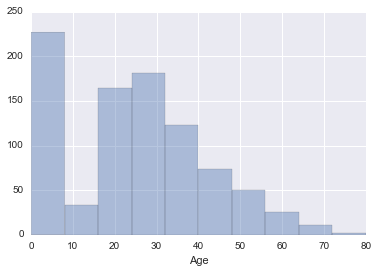

In [27]:
sns.distplot(td.loc[:,'Age'], kde=False, bins = 10)

(array([ 207.,   20.,   18.,   15.,   81.,   83.,   90.,   91.,   69.,
          54.,   39.,   35.,   32.,   18.,   13.,   13.,    6.,    5.,
           1.,    1.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.]),
 <a list of 20 Patch objects>)

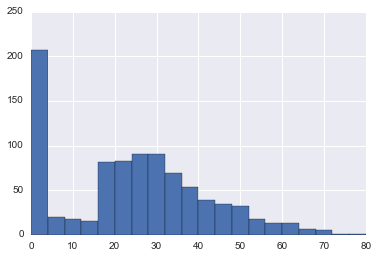

In [29]:
plt.hist(td.loc[:,'Age'], bins=20)

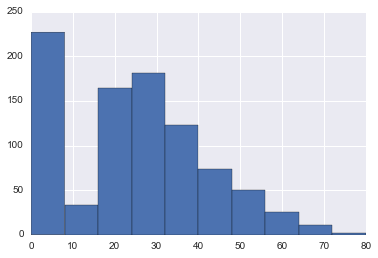

In [31]:
td['Age'].hist()

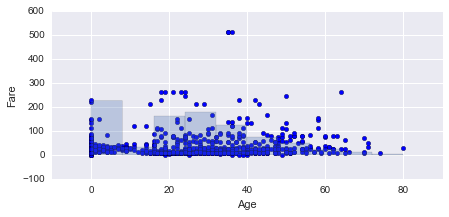

In [44]:
fig = plt.figure(figsize=(7,3))
ax = fig.gca()
ax.scatter(td['Age'],td['Fare'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.hist(td['Age'], alpha = 0.3)
plt.show()

In [41]:
td['something'] = td.Fare*1.3

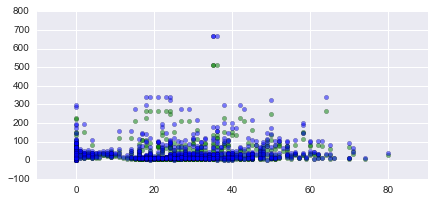

In [42]:
fig = plt.figure(figsize=(7,3))
ax = fig.gca()
ax.scatter(td['Age'],td['Fare'], c= 'Green', alpha = 0.5)
ax.scatter(td['Age'],td['something'], c= 'Blue', alpha = 0.5)
plt.show()

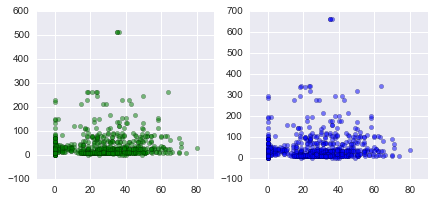

In [47]:
fig, ax_array = plt.subplots(1,2,figsize=(7,3))
ax_array[0].scatter(td['Age'],td['Fare'], c= 'Green', alpha = 0.5)
ax_array[1].scatter(td['Age'],td['something'], c= 'Blue', alpha = 0.5)
plt.show()

In [54]:
def normalize(df):
    df['fare_norm'] = (df['Fare'] - df['Fare'].mean())/df['Fare'].std()
    return df
td_new = td.groupby('Pclass').apply(normalize)
td_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,something,fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,9.42500,-0.545549
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,92.66829,-0.164217
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,10.30250,-0.488239
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,69.03000,-0.396205
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,10.46500,-0.477626
5,6,0,3,"Moran, Mr. James",male,0,0,0,330877,8.4583,NaN,Q,10.99579,-0.442960
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,67.42125,-0.411993
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,27.39750,0.628236
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,14.47329,-0.215845
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,39.09204,0.701225


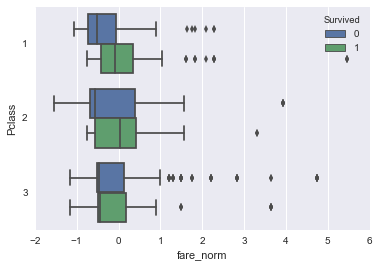

In [59]:
sns.boxplot(x='fare_norm',y='Pclass', data = td_new , hue='Survived', orient = 'h')
plt.show()

In [60]:
def some_function (df):
    df.loc[:,'num_rows'] = df.shape[0]
    return df

def k_apply(groups,function):
    
    return

In [76]:
# pivot table

pvttbl = pd.pivot_table(td, columns = 'Pclass', values = 'Fare', aggfunc = [np.mean, np.median, np.std])
clean_pvttbl = pd.DataFrame(pvttbl.to_records())

clean_pvttbl

   Pclass       mean   median        std
0       1  84.154687  60.2875  78.380373
1       2  20.662183  14.2500  13.417399
2       3  13.675550   8.0500  11.778142


In [89]:
pvttbl = pd.pivot_table(td, columns =['Pclass','Survived'], values = ['Age','Fare'], aggfunc = [np.mean, np.median, np.std])
clean_pvttbl = pd.DataFrame(pvttbl.to_records())

pvttbl.reset_index()

,level_0,Pclass,Survived,mean,median,std
0,Age,1,0,34.950000,38.5000,22.260199
1,Age,1,1,31.720588,33.5000,16.926285
2,Age,2,0,31.113402,30.0000,14.593004
3,Age,2,1,24.678161,27.0000,15.521549
4,Age,3,0,19.255376,20.0000,15.825935
5,Age,3,1,14.731092,16.0000,13.806592
6,Fare,1,0,64.684008,44.7500,60.662089
7,Fare,1,1,95.608029,77.9583,85.286820
8,Fare,2,0,19.412328,13.0000,15.307175
9,Fare,2,1,22.055700,21.0000,10.853502


In [ ]:
pd.melt(pvttbl,id_vars=['level_0'])